# **Projeto: Previsão de Intenção de Compra de Clientes em Loja Web**

**Descrição do Projeto**

Neste projeto, nosso objetivo é criar um sistema inteligente para antecipar a intenção de compra dos clientes em um site de e-commerce. Imagine poder prever quais clientes têm maior probabilidade de realizar compras online, com base em suas características e comportamentos passados. Essa capacidade de prever a intenção de compra não só aprimorará a experiência do cliente, mas também permitirá que a empresa direcione seus esforços de marketing de forma mais eficaz.

**Objetivo**

Queremos desenvolver um modelo preditivo capaz de analisar os padrões de comportamento dos clientes e identificar sinais que indicam a propensão deles para realizar compras no site da empresa. Para isso, vamos usar uma base de dados que contém informações detalhadas sobre os clientes, incluindo:

Dados demográficos (idade, renda, etc.)

Informações sobre compras anteriores



# Base de dados:

Year_Birth: Ano de nascimento do cliente.

Education: Nível de escolaridade do cliente.

Marital_Status: Estado civil do cliente.

Income: Renda anual da família do cliente.

Kidhome: Número de crianças na casa do cliente.

Recency: Número de dias desde a última compra do cliente.

Complain: 1 se o cliente reclamou nos últimos 2 anos, 0 caso contrário.

MntWines: Valor gasto em vinhos nos últimos 2 anos.

MntFruits: Valor gasto em frutas nos últimos 2 anos.

MntMeatProducts: Valor gasto em carnes nos últimos 2 anos.

MntFishProducts: Valor gasto em peixes nos últimos 2 anos.

MntSweetProducts: Valor gasto em doces nos últimos 2 anos.

MntGoldProds: Valor gasto em produtos de ouro nos últimos 2 anos.

NumDealsPurchases: Número de compras feitas com desconto

NumStorePurchases: Número de compras feitas diretamente nas lojas.

NumWebVisitsMonth: Número de visitas ao site da empresa no último mês.






**WebPurchases: Número de compras feitas pelo site da empresa.**

# ETAPA 1:

**Preparação dos Dados**

**Exploração e Limpeza:** Analisar e limpar os dados para garantir que estejam prontos para a modelagem.

**Análise:** Construa uma storytelling com gráficos, analisando e retirando insights das informações.

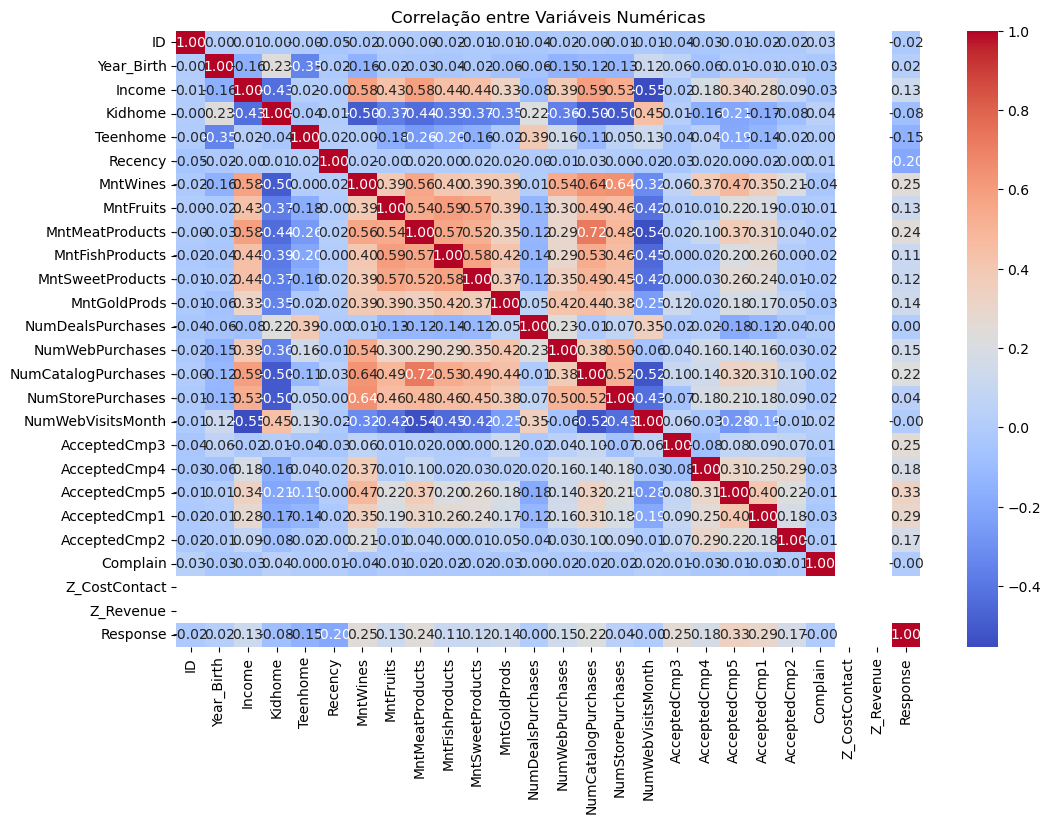

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Carregar os dados
df = pd.read_csv(r'C:\Users\DELL\Documents\ebac\portifolios\marketing_campaign.csv', delimiter=';')

# 2. Pré-processamento inicial
# Selecionar apenas colunas numéricas para a análise de correlação
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
df_numeric = df[numeric_cols]

# 3. Visualização da correlação (agora funcionará)
plt.figure(figsize=(12, 8))
sns.heatmap(df_numeric.corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlação entre Variáveis Numéricas')
plt.show()

# ETAPA 2:
**Pré-processamento**

**Análise Correlação:** Verifique a correlação entre as váriaveis e análise se há espaço para retirar váriaveis que não te parecem importantes.

**Codificação de Variáveis Categóricas:** Transformar variáveis categóricas em um formato que os modelos de machine learning possam interpretar.


**Separe a base em Y, X e Treino e teste:**: Faça a separação da base.

**Realize a padronização dos dados**: Padronize os dados para garantir eficiência no modelo e eficácia.








In [6]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from datetime import datetime

# 1. Carregar os dados
df = pd.read_csv(r'C:\Users\DELL\Documents\ebac\portifolios\marketing_campaign.csv', delimiter=';')

# 2. Pré-processamento avançado
# Converter data para valor numérico (dias desde a data mais antiga)
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'])
min_date = df['Dt_Customer'].min()
df['Days_Customer'] = (df['Dt_Customer'] - min_date).dt.days

# Remover colunas problemáticas
df = df.drop(['ID', 'Z_CostContact', 'Z_Revenue', 'Dt_Customer'], axis=1)

# Codificar variáveis categóricas
le = LabelEncoder()
categorical_cols = ['Education', 'Marital_Status']
for col in categorical_cols:
    df[col] = le.fit_transform(df[col])

# 3. Definir variáveis
target_col = 'NumWebPurchases'  # Usando a coluna correta de compras web
X = df.drop(target_col, axis=1)
y = df[target_col]

# 4. Dividir e padronizar
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Verificar e remover possíveis valores infinitos
X_train = X_train.replace([np.inf, -np.inf], np.nan).fillna(0)
X_test = X_test.replace([np.inf, -np.inf], np.nan).fillna(0)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Pré-processamento concluído com sucesso!")
print(f"Shape dos dados: X_train={X_train_scaled.shape}, X_test={X_test_scaled.shape}")

Pré-processamento concluído com sucesso!
Shape dos dados: X_train=(1568, 25), X_test=(672, 25)


# ETAPA 3:

**Modelagem**

Escolha ao menos 2 técnicas de machine learning e rode 2 modelos, afim de identificar qual tem o melhor resultado para essa base. Lembrando que estamos lidando com uma classificação binária.

In [7]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Verificando se temos dados suficientes
print(f"Shape dos dados preparados: X_train={X_train_scaled.shape}, X_test={X_test_scaled.shape}")

# 1. Convertendo o problema para classificação binária
# Vamos considerar "cliente ativo" (NumWebPurchases > 0) como classe positiva
y_train_bin = (y_train > 0).astype(int)
y_test_bin = (y_test > 0).astype(int)

# 2. Modelo 1: Regressão Logística
log_model = LogisticRegression(max_iter=1000, random_state=42)
log_model.fit(X_train_scaled, y_train_bin)
y_pred_log = log_model.predict(X_test_scaled)

# 3. Modelo 2: Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled, y_train_bin)
y_pred_rf = rf_model.predict(X_test_scaled)

# 4. Comparação rápida
print("\nDesempenho dos Modelos:")
print("Regressão Logística - Acurácia:", accuracy_score(y_test_bin, y_pred_log))
print("Random Forest - Acurácia:", accuracy_score(y_test_bin, y_pred_rf))

Shape dos dados preparados: X_train=(1568, 25), X_test=(672, 25)

Desempenho dos Modelos:
Regressão Logística - Acurácia: 0.9791666666666666
Random Forest - Acurácia: 0.9880952380952381


# ETAPA 4:

**Avaliação**

Avalie os resultados encontrados nos dois modelos e identifique qual te pareceu realizar melhor as previsões.

Utilize além das métricas padrões a matriz de confusão.


Relatório Regressão Logística:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        13
           1       0.98      1.00      0.99       659

    accuracy                           0.98       672
   macro avg       0.49      0.50      0.49       672
weighted avg       0.96      0.98      0.97       672


Relatório Random Forest:
              precision    recall  f1-score   support

           0       1.00      0.38      0.56        13
           1       0.99      1.00      0.99       659

    accuracy                           0.99       672
   macro avg       0.99      0.69      0.77       672
weighted avg       0.99      0.99      0.99       672



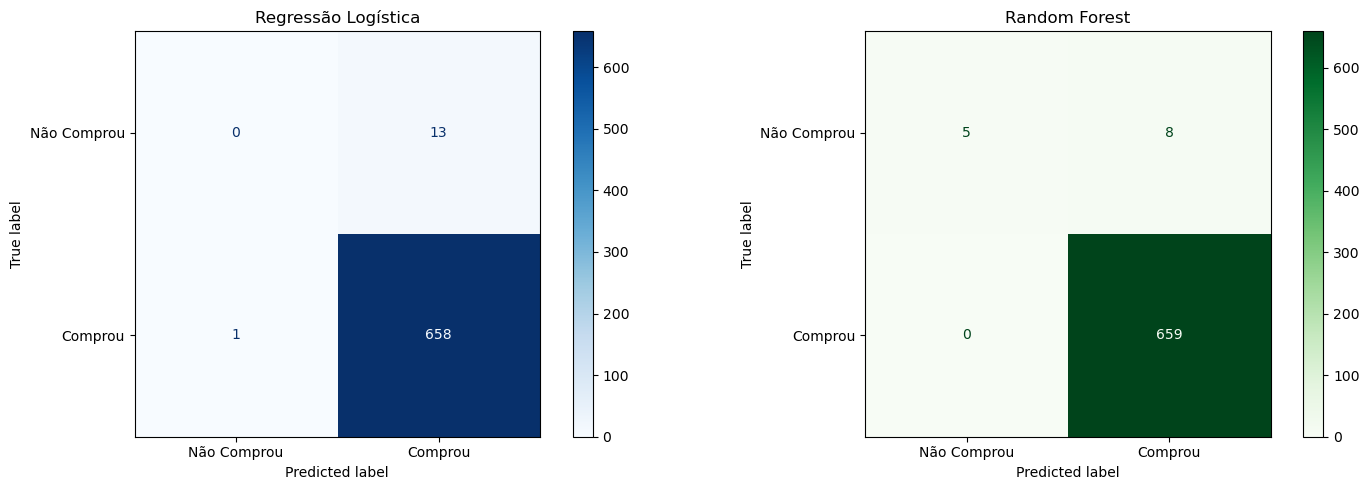

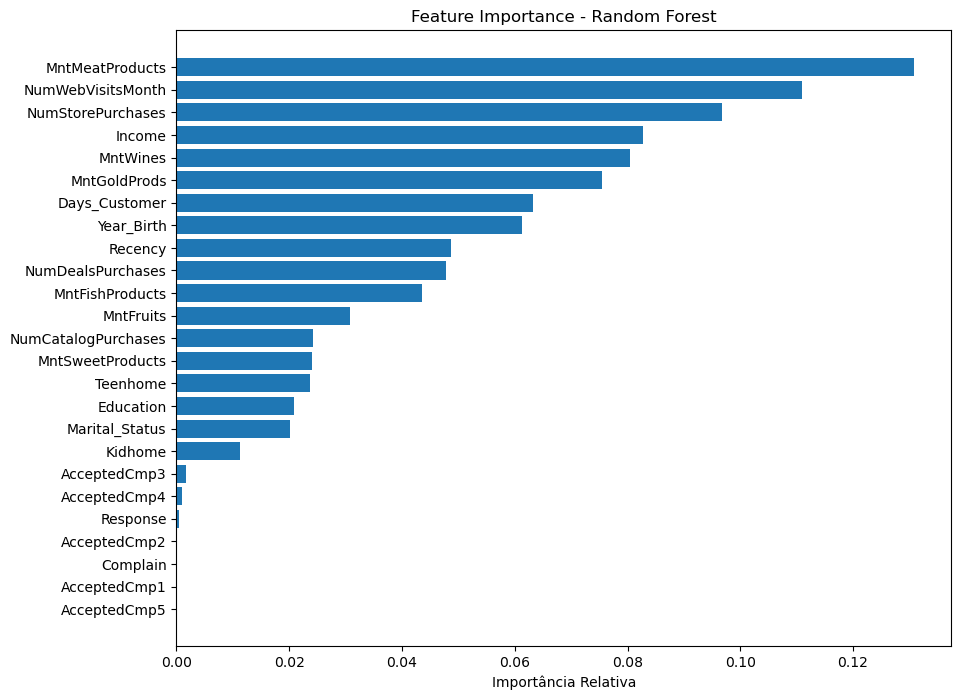

In [8]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# 1. Relatórios completos
print("\nRelatório Regressão Logística:")
print(classification_report(y_test_bin, y_pred_log))

print("\nRelatório Random Forest:")
print(classification_report(y_test_bin, y_pred_rf))

# 2. Matrizes de Confusão
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

# Matriz para Regressão Logística
ConfusionMatrixDisplay.from_predictions(y_test_bin, y_pred_log, 
                                       display_labels=['Não Comprou', 'Comprou'],
                                       cmap='Blues', ax=ax1)
ax1.set_title('Regressão Logística')

# Matriz para Random Forest
ConfusionMatrixDisplay.from_predictions(y_test_bin, y_pred_rf,
                                      display_labels=['Não Comprou', 'Comprou'],
                                      cmap='Greens', ax=ax2)
ax2.set_title('Random Forest')

plt.tight_layout()
plt.show()

# 3. Feature Importance (apenas para Random Forest)
importances = rf_model.feature_importances_
features = X.columns
sorted_idx = importances.argsort()

plt.figure(figsize=(10, 8))
plt.barh(range(len(sorted_idx)), importances[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), features[sorted_idx])
plt.xlabel('Importância Relativa')
plt.title('Feature Importance - Random Forest')
plt.show()